In [1]:
### Lee datos de presión atmosférica de
# la estación meteorológica de jicamarca.
#
## Plot inline
%matplotlib inline
#'exec(%matplotlib inline)'
# Increase plotting resolution to vector format
%config InlineBackend.figure_format = 'svg'

from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.ticker import MultipleLocator, ScalarFormatter

import numpy as np
from IPython import display
import matplotlib.gridspec as gridspec
import sys

import math as math
import datetime
from datetime import timedelta, date

#import datetime as dt
import os
import glob
import matplotlib.dates as mdates
print (sys.path)
import pandas as pd
#import seaborn as sns
import matplotlib.dates as dates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, YearLocator
#from model_utils import *
import datetime as dt
from datetime import timedelta
from apa_utils import *

['/home/jp/Desktop-ROJ/Atmospheric-Pressure', '/home/jp/miniconda3/lib/python39.zip', '/home/jp/miniconda3/lib/python3.9', '/home/jp/miniconda3/lib/python3.9/lib-dynload', '', '/home/jp/miniconda3/lib/python3.9/site-packages']
['/home/jp/Desktop-ROJ/Atmospheric-Pressure', '/home/jp/miniconda3/lib/python39.zip', '/home/jp/miniconda3/lib/python3.9', '/home/jp/miniconda3/lib/python3.9/lib-dynload', '', '/home/jp/miniconda3/lib/python3.9/site-packages']


# Sección nueva

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
#
pd.options.display.max_rows = 20
path_plot ='Plots/'

#path='/content/drive/MyDrive/Colab Notebooks/'
path='Data/'

filename  =path + 'jro_em_202201.csv'
filename2 =path + 'piura_em_202201.csv'
filename3 =path + 'hua_em_202201.dat'


df1 = read_met_jro(filename)
df2 = read_met_piura (filename2)
#df3 = read_met_huancayo(filename3)
#
df3 = pd.read_csv(filename3, delim_whitespace=True)
df3['time']=df3['hr'].astype(str)+':'+\
    df3['mi'].astype(str)+':'+\
    df3['se'].astype(str)
df3['date']= df3['year'].astype(str)+'-'+\
    df3['mo'].astype(str)+'-'+df3['dy'].astype(str)
df3['Bar']= df3['Bar'].astype(float)
df3["timestamps"] = pd.to_datetime(df3["date"] + ' ' +
                    df3["time"]) + pd.Timedelta(hours=5)
df3.set_index('timestamps',inplace=True)
print( df3.columns )
print( df3.head )

>>Reading data from; Data/jro_em_202201.csv
>>Reading data from; Data/piura_em_202201.csv
Index(['year', 'mo', 'dy', 'hr', 'mi', 'se', 'Bar', 'time', 'date'], dtype='object')
<bound method NDFrame.head of                      year  mo  dy  hr  mi  se    Bar     time       date
timestamps                                                              
2022-01-01 05:00:00  2022   1   1   0   0   0  687.0    0:0:0   2022-1-1
2022-01-01 05:01:00  2022   1   1   0   1   0  687.0    0:1:0   2022-1-1
2022-01-01 05:02:00  2022   1   1   0   2   0  687.0    0:2:0   2022-1-1
2022-01-01 05:03:00  2022   1   1   0   3   0  687.0    0:3:0   2022-1-1
2022-01-01 05:04:00  2022   1   1   0   4   0  687.0    0:4:0   2022-1-1
...                   ...  ..  ..  ..  ..  ..    ...      ...        ...
2022-02-01 04:55:00  2022   1  31  23  55   0  685.7  23:55:0  2022-1-31
2022-02-01 04:56:00  2022   1  31  23  56   0  685.7  23:56:0  2022-1-31
2022-02-01 04:57:00  2022   1  31  23  57   0  685.7  23:57:0  20

/tmp/ipykernel_107549/3626563678.py:61: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_day2 = df2.loc[str_i:str_f]
/tmp/ipykernel_107549/3626563678.py:121: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_day2 = df2.loc[str_i:str_f]
/tmp/ipykernel_107549/3626563678.py:121: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_day2 = df2.loc[str_i:str_f]
/tmp/ipykernel_107549/3626563678.py:121: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_day2 = df2.loc[str_i:str_f]
/tmp/ipykernel_107549/3626563678.py:121: FutureWarning: Value bas

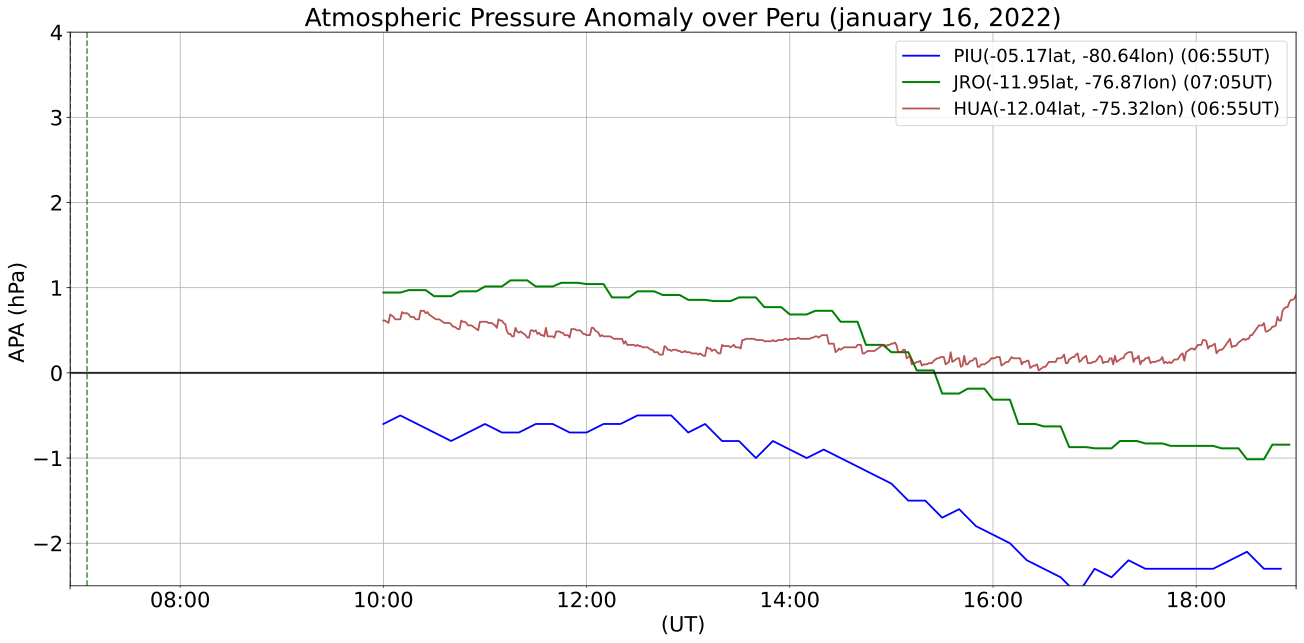

In [11]:
from pandas.core.internals.construction import nested_data_to_arrays
# plot data.

station="Peru"
ndatat= 60*24 # total minute Data in a day
nint1= 5  # bases On 5 min data
nint2=10   # bases On 10 min data
nint3=1    # bases On 1 min data

days = list(range(1,32))

str_month = 'january'
#str_month = 'Enero'

nday= 16#15#15 #16  # day to plot
hour_i= 10#5#10#5#4#10#4 #5
hour_f= 18#11#16#11#13#16 #13

legendsize= 18   # char size for legen
timesize=20      # char size for time
# some values for detected eruption
piu16h= 6
piu16m=55
piu15h= 13
piu15m= 40
piucoord = '-05.17lat, -80.64lon' 

jro16h= 7
jro16m= 5
jro15h= 13
jro15m= 50
jrocoord = '-11.95lat, -76.87lon'

hua16h= 6
hua16m=55
hua15h= 14
hua15m= 0
huacoord = '-12.04lat, -75.32lon'

if nday==15:
   piustr='PIU(%s) (%02d:%02dUT)' %(piucoord,  piu15h, piu15m)
   jrostr='JRO(%s) (%02d:%02dUT)' %(jrocoord,  jro15h, jro15m)
   huastr='HUA(%s) (%02d:%02dUT)' %(huacoord,  hua15h, hua15m)
elif nday==16:
   piustr='PIU(-05.17lat, -80.64lon) (%02d:%02dUT)' %(piu16h, piu16m)
   jrostr='JRO(%s) (%02d:%02dUT)' %(jrocoord,  jro16h, jro16m)
   huastr='HUA(%s) (%02d:%02dUT)' %(huacoord,  hua16h, hua16m)

ymin=-2.50
ymax= 4.0
#
ndays2=0
ndays3=0
ndays=0

# stable mean estimación. 
for day in days:
    str_i = '2022-01-%02d %02d:00:00' % (day, hour_i)
    str_f = '2022-01-%02d %02d:59:00' % (day, hour_f)
    df_day  = df1.loc[str_i:str_f]
    df_day2 = df2.loc[str_i:str_f]
    df_day3 = df3.loc[str_i:str_f]
    list_aux = []
    list_aux2 = []
    list_aux3 = []
    for ind in df_day.index:
        str_date_aux = '%d-%02d-%02d %02d:%02d:%02d'%\
          (ind.year,ind.month, nday, ind.hour, ind.minute,0)
        list_aux.append(str_date_aux)
    for ind2 in df_day2.index:
        str_date_aux2 = '%d-%02d-%02d %02d:%02d:%02d'%\
         (ind2.year,ind2.month, nday  , ind2.hour, ind2.minute,0)
        list_aux2.append(str_date_aux2)
    for ind3 in df_day3.index:
        str_date_aux3 = '%d-%02d-%02d %02d:%02d:%02d'%\
         (ind3.year,ind3.month, nday , ind3.hour, ind3.minute,0)
        list_aux3.append(str_date_aux3)

    list_aux = pd.DatetimeIndex(list_aux)
    list_aux2 = pd.DatetimeIndex(list_aux2)
    list_aux3 = pd.DatetimeIndex(list_aux3)

    df_day.set_index(list_aux,inplace=True)
    df_day2.set_index(list_aux2,inplace=True)
    df_day3.set_index(list_aux3,inplace=True)
## for jicamarca station
    if((day>5)and(day<=14))and(day!=9)and(day!=10 ) :
      if ndays==0:
        media=df_day['Bar']
      else:
        media=df_day['Bar'] + media
      ndays=ndays+1
    if day==15:
      media= media.div(ndays)
# for Piura station
    if((day>13)and(day<=14)):
      if ndays2==0:
        media2=df_day2['Bar']
      else:
        media2=df_day2['Bar'] + media2
      ndays2=ndays2+1
    if day==15:
      media2= media2.div(ndays2)
   #Huancayo
    if((day>7)and(day<=14)) :
      if ndays3==0:
        media3=df_day3['Bar']
      else:
        media3 =df_day3['Bar'] + media3 
      ndays3 =ndays3 +1
    if day==15:
      media3 = media3.div(ndays3)
#####################
# plot presión
fig3, ax3 = plt.subplots(figsize= (22,10))
for day in days:
    str_i = '2022-01-%02d %02d:00:00' % (day, hour_i)
    str_f = '2022-01-%02d %02d:59:00' % (day, hour_f)
    str_aux = '2022-01-%02d' % day
    df_day = df1.loc[str_i:str_f]
    df_day2 = df2.loc[str_i:str_f]
    df_day3  = df3.loc[str_i:str_f]
    list_aux = []
    list_aux2 = []
    list_aux3  = []
    for ind in df_day.index:
        str_date_aux = '%d-%02d-%02d %02d:%02d:%02d'\
         % (ind.year,ind.month, ind.day , ind.hour, ind.minute,0)
        list_aux.append(str_date_aux)
    for ind2 in df_day2.index:
        str_date_aux2 = '%d-%02d-%02d %02d:%02d:%02d'\
         % (ind2.year,ind2.month, ind2.day , ind2.hour, ind2.minute,0)
        list_aux2.append(str_date_aux2)
    for ind3  in df_day3.index:
        str_date_aux3 = '%d-%02d-%02d %02d:%02d:%02d'\
         % (ind3.year,ind3.month, ind3.day , ind3.hour, ind3.minute,0)
        list_aux3.append(str_date_aux3)
    list_aux = pd.DatetimeIndex(list_aux)
    list_aux2 = pd.DatetimeIndex(list_aux2)
    list_aux3 = pd.DatetimeIndex(list_aux3)
#
    df_day.set_index(list_aux,inplace=True)
    df_day2.set_index(list_aux2,inplace=True)
    df_day3.set_index(list_aux3,inplace=True)
#
    baro= df_day['Bar']-media
    baro2= df_day2['Bar']-media2
    baro3 = df_day3['Bar']-media3 
#
    if day== nday:# for 16
          str_day = '%02d' % day
          baro2.plot(label= piustr,marker='', color='blue', linewidth=1.8, alpha=1.0)
          if day==16:
           plt.axvline(x=dt.datetime(2022,1,nday ,piu16h,piu16m,00), color='blue', linestyle='--', linewidth=1.5, alpha=0.8)
          elif day==15:
           plt.axvline(x=dt.datetime(2022,1,nday ,piu15h,piu15m,00), color='blue', linestyle='--', linewidth=1.5, alpha=0.8)
          baro.plot( label=jrostr, marker='', color='green', linewidth=2, alpha=1.0)
          if day==16:
              plt.axvline(x=dt.datetime(2022,1,nday ,jro16h,jro16m,00), color='green', linestyle='--', linewidth=1.5, alpha=0.8)
          elif day==15:
              plt.axvline(x=dt.datetime(2022,1,nday ,jro15h,jro15m,00), color='green', linestyle='--', linewidth=1.5, alpha=0.8)
    
          baro3.plot(label= huastr, marker='', color='brown', linewidth=1.8, alpha=0.8)
          if day==16:
            plt.axvline(x=dt.datetime(2022,1, nday ,hua16h,hua16m,0),
              color='brown', linestyle='--', linewidth=1.5, alpha=0.8)
          elif day==15:
            plt.axvline(x=dt.datetime(2022,1, nday ,hua15h,hua15m,0),
              color='brown', linestyle='--', linewidth=1.5, alpha=0.8)
          if day==15:
            plt.axvline(x=dt.datetime(2022,1,nday ,4,10,0), color='cyan', linestyle='-', linewidth=3, alpha=0.8)
            plt.axvline(x=dt.datetime(2022,1, nday ,10,54,0),
            color='orange', linestyle='--', linewidth=2, alpha=1.0,
            label='sunrise(10:55UT), noon(17:17UT)')
            plt.axvline(x=dt.datetime(2022,1,nday,17,17,0), color='orange',
                  linestyle='--', linewidth=2, alpha=0.8)
            plt.axvline(x=dt.datetime(2022,1, nday,23,40,0), color='orange',
                  linestyle='--', linewidth=2, alpha=0.8)
    ax3.set_xlabel('(UT)',fontsize=21)
    ax3.set_ylabel('APA (hPa) ', fontsize=21)
    ax3.set_title('Atmospheric Pressure Anomaly over %s (%s %d, 2022)' %( station, str_month, nday), fontsize=25)
    #ax3.set_title('Anomalia de la Presión atmosférica sobre Jicamarca(%s 2022)' % str_month, fontsize=25)
    ax3.tick_params(axis='y', which='both', labelsize=21)
    ax3.tick_params(axis='x', which='both', labelsize=21)
#######
plt.axhline(y=0.0, color='black', linestyle='-', linewidth=2, alpha=0.8)
plt.grid(True,which='both')
plt.ylim(ymin, ymax)
plt.legend( fontsize=legendsize,loc="upper right")
plt.savefig(path_plot+'2022'+str_month+str_day+ 'zoom' + '.png', bbox_inches="tight")
plt.savefig(path_plot +'2022'+str_month+str_day+ 'zoom' +'.pdf', bbox_inches="tight")
plt.show()

In [4]:
def arrival_time(dist,c):
    t_aux = dist/c
    dt0 = dt.datetime(2022,1,15,4,18,0)
    #t_huancayo = dist_huancayo/c
    h = int(t_aux)
    min_aux = (t_aux - int(t_aux))*60
    minute = int(min_aux)
    sec_aux = (min_aux-int(min_aux))
    sec = int(sec_aux)
    #print(h,minute,sec)
    delta = pd.Timedelta(hours=h,minutes=minute,seconds=sec)
    tf = dt0 + delta
    #print(tf)
    return tf

In [5]:
dist_piura = 10270.67
dist_huancayo = 10544.66 
dist_roj = 10390.95
c=350*(1/1000)*(3600)


In [6]:
t_roj = arrival_time(dist_roj,c)
t_piura = arrival_time(dist_piura,c)
t_huancayo = arrival_time(dist_huancayo,c)
print(t_roj,t_piura,t_huancayo)

2022-01-15 12:32:00 2022-01-15 12:27:00 2022-01-15 12:40:00


In [7]:
vi = 280
vf = 400
ci=vi*(1/1000)*(3600)
cf=vf*(1/1000)*(3600)
num=20
vs = np.linspace(vi,vf,num)
cs = np.linspace(ci,cf,num)

In [8]:
t_r = []
t_p = []
t_h = []
dt_rp = []
dt_hp = []
#dt_h = []
dt0 = dt.datetime(2022,1,15,4,18,0)
for c in cs:
    dt_roj = arrival_time(dist_roj,c)
    dt_piura = arrival_time(dist_piura,c)
    dt_huancayo = arrival_time(dist_huancayo,c)
    t_r.append(dt_roj)
    t_p.append(dt_piura)
    t_h.append(dt_huancayo)
    dt_rp.append((dt_roj-dt_piura).total_seconds())
    dt_hp.append((dt_huancayo-dt_piura).total_seconds())

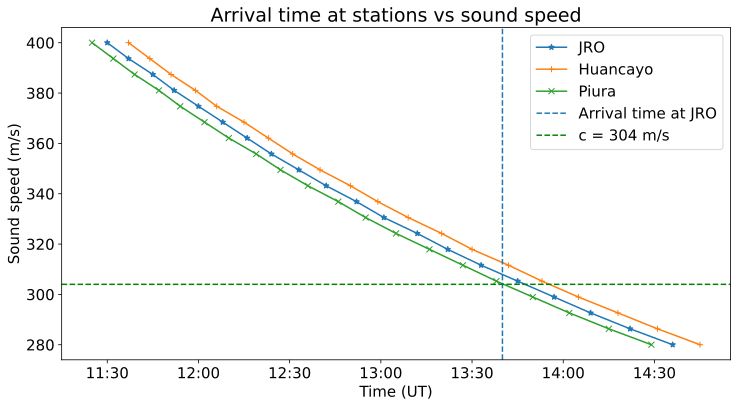

In [9]:
fontsize = 15
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t_r,vs,label='JRO',marker='*')
ax.plot(t_h,vs,label='Huancayo',marker='+')
ax.plot(t_p,vs,label='Piura',marker='x')
ax.axvline(x=dt.datetime(2022,1,15,13,40,0),linestyle='dashed',label='Arrival time at JRO')
ax.axhline(304,linestyle='dashed',color='green',label=r'c = 304 m/s')
ax.xaxis_date()
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.set_title('Arrival time at stations vs sound speed',fontsize=fontsize+4)
ax.set_xlabel('Time (UT)',fontsize=fontsize)
ax.set_ylabel('Sound speed (m/s)',fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.savefig('arrival-time-vs-sounds-speed-barometers.png',bbox_inches='tight')

In [ ]:
fontsize = 15
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(vs,np.array(dt_rp)/60,label=r'$t_{JRO}-t_{PIURA}$',marker='*')
ax.plot(vs,np.array(dt_hp)/60,label=r'$t_{Huancayo}-t_{PIURA}$',marker='x')
ax.axvline(304,linestyle='dashed',color='green',label=r'c = 304 m/s')
#ax.xaxis_date()
#date_format = mdates.DateFormatter('%H:%M')
#ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.set_title(r'Time delay compared to $t_{PIURA}$ vs sound speed',fontsize=fontsize+4)
ax.set_ylabel(r'$\Delta t$(min)',fontsize=fontsize)
ax.set_xlabel('Sound speed (m/s)',fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.savefig('time-delay-vs-sounds-speed-barometers.png',bbox_inches='tight')